In [1]:
import os
# Obtenez le répertoire de travail actuel
repertoire = os.getcwd()
print("Répertoire actuel :", repertoire)

Répertoire actuel : C:\Users\pc


In [2]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np


In [3]:
# Define image dimensions
img_width, img_height = 224, 224

In [4]:
# Define paths to your train, validation, and test data
train_data_dir = 'C:/Users/pc/Desktop/AUtism_database/Autism_database/AutismDataset/training'
validation_data_dir = 'C:/Users/pc/Desktop/AUtism_database/Autism_database/AutismDataset/valid'
test_data_dir = 'C:/Users/pc/Desktop/AUtism_database/Autism_database/AutismDataset/Test'

In [5]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255, # image pixels from [0,255] ====> [0,1]
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' # Startegy to fill empty pixels after shifting or rotation
)

In [6]:
# Data augmentation for validation and test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [8]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [10]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,550,721 (78.39 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
# Data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2540 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [13]:
# Train the model
with tf.device('/GPU:0'):
    model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40
        ,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/40


C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.5860 - loss: 0.6842 - val_accuracy: 0.7292 - val_loss: 0.6094
Epoch 2/40
 1/79 ━━━━━━━━━━━━━━━━━━━━ 2:28 2s/step - accuracy: 0.6875 - loss: 0.6206

C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6875 - loss: 0.3142 - val_accuracy: 0.7500 - val_loss: 0.3420
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6897 - loss: 0.6132 - val_accuracy: 0.7604 - val_loss: 0.5709
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7188 - loss: 0.2943 - val_accuracy: 0.5000 - val_loss: 0.3329
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.6942 - loss: 0.5931 - val_accuracy: 0.7188 - val_loss: 0.5641
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8125 - loss: 0.2648 - val_accuracy: 1.0000 - val_loss: 0.1757
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7277 - loss: 0.5715 - val_accuracy: 0.7396 - val_loss: 0.5533
Epoch 8/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5938 - loss: 0.2905 - val_accuracy: 0.7500 - val_loss: 0.2015
Epoch 9/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7116 - loss: 0.5578 - val_accuracy: 0.7604 - val_loss: 0.5389

In [14]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

Found 300 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7677 - loss: 0.4943
Test Accuracy: 0.7733333110809326


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, 
    shuffle=False,  
    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [16]:
# Predict on test data
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions > 0.6  # threshold

C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


In [17]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

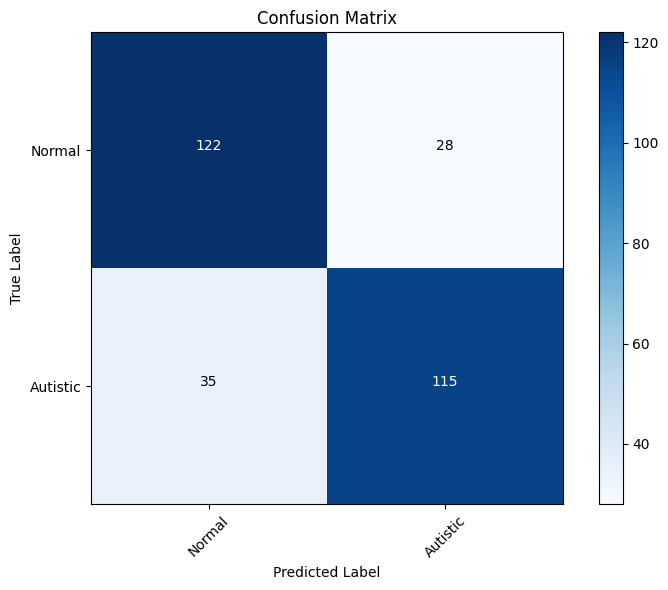

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Autistic'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Autistic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Text annotations
thresh = conf_matrix.max() / 2.
for i, j in ((i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [19]:
# Extract true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = conf_matrix.ravel()
# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.7666666666666667
Specificity (True Negative Rate): 0.8133333333333334
